<a href="https://colab.research.google.com/github/username1103/tensorflow_example/blob/master/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [6]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [18]:
paths = glob.glob('./notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))])
종속 = np.array([paths[i].split('/')[-2] for i in range(len(paths))])

print(독립.shape, 종속.shape)

(18724, 28, 28) (18724,)


In [19]:
독립 = 독립.reshape(18724,28,28,1)
종속 = pd.get_dummies(종속)
print(독립.shape , 종속.shape)

(18724, 28, 28, 1) (18724, 10)


In [20]:
# 모델 생성
X = tf.keras.layers.Input(shape=[28,28,1])

H = tf.keras.layers.Conv2D(6,kernel_size=5, padding='same', activation='swish')(X) # padding = 'same' 을 주면 feature map의 사이즈가 input 사이즈와 같게 된다.
H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(16,kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [21]:
model.fit(독립,종속,epochs=10)

Epoch 1/10
586/586 [==============================] - 15s 23ms/step - loss: 0.7287 - accuracy: 0.7820
Epoch 2/10
586/586 [==============================] - 14s 23ms/step - loss: 0.2739 - accuracy: 0.9168
Epoch 3/10
586/586 [==============================] - 13s 23ms/step - loss: 0.2213 - accuracy: 0.9354
Epoch 4/10
586/586 [==============================] - 13s 23ms/step - loss: 0.1879 - accuracy: 0.9422
Epoch 5/10
586/586 [==============================] - 13s 23ms/step - loss: 0.1545 - accuracy: 0.9509
Epoch 6/10
586/586 [==============================] - 13s 23ms/step - loss: 0.1274 - accuracy: 0.9596
Epoch 7/10
586/586 [==============================] - 13s 22ms/step - loss: 0.1121 - accuracy: 0.9620
Epoch 8/10
586/586 [==============================] - 13s 22ms/step - loss: 0.0903 - accuracy: 0.9715
Epoch 9/10
586/586 [==============================] - 13s 22ms/step - loss: 0.0758 - accuracy: 0.9749
Epoch 10/10
586/586 [==============================] - 13s 22ms/step - loss: 0.062

In [22]:
results = model.predict(독립[0:2])
pd.DataFrame(results).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.11,0.12,0.02,0.16,0.02,0.03,0.4,0.04,0.05,0.04
1,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00


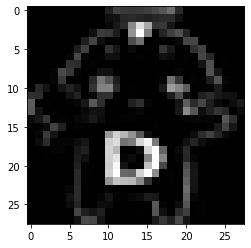

In [29]:
plt.imshow(독립[0].reshape(28,28), cmap='gray')

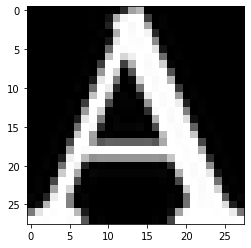

In [30]:
plt.imshow(독립[1].reshape(28,28), cmap='gray')